In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
master = pd.ExcelFile("CONTE_TWIN_CT_SA_tlaplace_Master.xlsx")

In [3]:
master.sheet_names

['ROIs',
 '1_2_CONTE_CT_tlaplace_dROI',
 '1_2_CONTE_SA_dROI',
 '1_2_CONTE_TotalCT_SA',
 '1_2_TWIN_CT_tlaplace_dROI',
 '1_2_TWIN_SA_dROI',
 '1_2_TWIN_TotalCT_SA',
 '4_6_CONTE_CT_tlaplace_dROI',
 '4_6_CONTE_SA_dROI',
 '4_6_CONTE_TotalCT_SA',
 '4_6_TWIN_CT_tlaplace_dROI',
 '4_6_TWIN_SA_dROI',
 '4_6_TWIN_TotalCT_SA']

In [4]:
ct1_2y = master.parse('1_2_CONTE_CT_tlaplace_dROI')
#ct1_2_twin = master.parse('1_2_TWIN_CT_tlaplace_dROI')
ct4_6y = master.parse('4_6_CONTE_CT_tlaplace_dROI')
#ct4_6_twin = master.parse('4_6_TWIN_CT_tlaplace_dROI')

In [5]:
ct1_2y.rename(columns={'ROI':'SubjectId'},inplace=True)
ct4_6y.rename(columns={'ROI':'SubjectId'},inplace=True)

# There is probably a better way to add the age column to each record based off the recordId
ct1y = ct1_2y.loc[ct1_2y['SubjectId'].str.contains("1year"),:]
ones = pd.DataFrame(data=[1] * ct1y.shape[0], columns=["Age"])
ct1y = pd.concat([ct1y, ones] ,axis=1).dropna()
     
ct2y = ct1_2y.loc[ct1_2y['SubjectId'].str.contains("2year"),:]
twos = pd.DataFrame(data=[2] * ct2y.shape[0], columns=["Age"])
ct2y = pd.concat([ct2y, twos] ,axis=1).dropna()

ct4y = ct4_6y.loc[ct4_6y['SubjectId'].str.contains("4year"),:]
fours = pd.DataFrame(data=[4] * ct4y.shape[0], columns=["Age"])
ct4y = pd.concat([ct4y, fours] ,axis=1).dropna()

ct6y = ct4_6y.loc[ct4_6y['SubjectId'].str.contains("6year"),:]
sixes = pd.DataFrame(data=[6] * ct6y.shape[0], columns=["Age"])
ct6y = pd.concat([ct6y, sixes] ,axis=1).dropna()

# Combine dataframe
ctdf = pd.concat([ct1y, ct2y, ct4y, ct6y], axis=0)
ctdf.head()

,SubjectId,11101,11102,11103,11104,11105,11106,11107,11108,11109,...,12167,12168,12169,12170,12171,12172,12173,12174,12175,Age
1,neo-0011-2-1-1year,4.050688,3.304595,2.650636,3.083899,4.502679,3.826259,3.209879,3.050981,3.553337,...,3.145372,2.673006,2.751749,2.741605,4.534717,3.015895,3.597010,3.102670,2.690846,1.0
3,neo-0012-2-1-1year,4.312559,3.102239,2.796724,3.367999,4.663712,3.832245,3.321145,3.113164,3.875833,...,3.563261,2.985851,3.296666,2.866994,4.701392,3.283940,5.399701,3.458641,2.781090,1.0
7,neo-0019-2-1-1year,3.835562,2.796402,2.889110,2.973568,4.026763,3.655617,3.381454,3.283121,3.581134,...,2.752838,2.756284,2.914380,2.820206,2.950484,3.388140,3.343730,2.910036,2.847324,1.0
11,neo-0029-3-1year,3.871388,3.260604,2.853854,3.344843,4.186668,3.541346,3.176965,3.015144,3.241821,...,3.431237,2.604907,2.707146,2.699048,3.405425,2.862766,4.021801,3.121831,2.879460,1.0
13,neo-0034-1-1year,4.230568,3.530593,2.976314,3.260474,3.884747,3.471779,3.539922,3.462861,3.961726,...,3.227825,2.958001,2.985017,2.962685,3.835062,3.419450,4.360485,3.133479,2.936947,1.0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# standardize values for PCA
x = ctdf.loc[:, ~ctdf.columns.isin(['SubjectId', 'Age'])] #This line separates out the features I think.
x = StandardScaler().fit_transform(x)
x.shape

features = ctdf.drop(['SubjectId', 'Age'], axis=1)



#From online tutorial. They separate features, but we don't have target values I don't think?

'''features = ['sepal length', 'sepal width', 'petal length', 'petal width'] 
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)'''

In [8]:
pca = PCA(n_components=150)
pca.fit(x)

pca

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pcs = []
for i in range(1,151):
    pcs.append('PC' + str(i))
principalComponentDf = pd.DataFrame(data = np.transpose(pca.components_), columns = pcs)
columnNames = pd.DataFrame(data = ctdf.columns.values.tolist()[1:], columns = ['ROI'])
principalComponentDf = pd.concat([columnNames, principalComponentDf], axis=1)
# why does the dataframe have 151 rows?
principalComponentDf.head()

,ROI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150
0,11101,0.079048,0.152218,-0.043270,0.160068,0.023672,-0.012580,-0.049065,-0.045894,-0.121350,...,0.206285,0.180542,0.014596,0.303756,0.039030,-0.231078,0.202080,-0.088011,0.256654,-0.228419
1,11102,0.095482,0.058689,-0.014965,0.170072,0.036913,0.007262,-0.023107,0.033091,-0.028472,...,0.070634,0.152309,0.068017,-0.084128,-0.026047,-0.062145,-0.029700,0.053309,0.023774,0.055523
2,11103,0.068632,-0.154154,0.017577,0.087436,0.098970,-0.105747,0.017392,-0.043282,-0.011518,...,-0.085219,-0.025799,-0.008487,0.089959,-0.093016,0.106328,-0.134304,-0.068580,0.093872,0.074333
3,11104,0.096910,-0.028272,-0.107477,-0.043782,-0.011099,0.005171,-0.000704,0.038823,0.015367,...,0.079707,-0.041459,0.021322,-0.032215,-0.003415,-0.007529,-0.024748,0.045574,0.022385,-0.043273
4,11105,0.079612,0.125766,-0.051605,0.170847,0.021771,-0.072924,-0.049702,-0.025363,-0.122511,...,-0.028560,-0.085599,0.010122,-0.086231,0.085982,-0.022585,-0.093892,0.212486,-0.104785,0.074923


Text(0.5, 0, 'Principal Component')

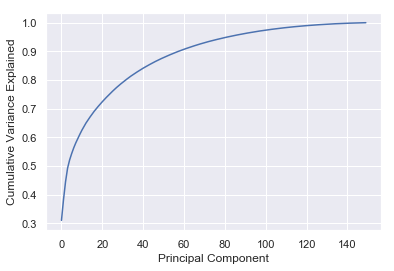

In [10]:
cumVar = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumVar)
plt.ylabel("Cumulative Variance Explained")
plt.xlabel("Principal Component")

In [11]:
# Keep only the principal components that cumulatively explain at 90% of the variance
imptPCs = pcs[:len(cumVar[cumVar <= .9])]
principalComponentDf = principalComponentDf.loc[:, imptPCs]
#principalComponentDf.head()

In [12]:
# For visualization keep 2 principal components
print(pca.explained_variance_ratio_[0:2]) #variance explained by first two PCs

#x = ctdf.loc[:, ~ctdf.columns.isin(['SubjectId', 'Age'])]
firstTwoPCs = pd.DataFrame(data = pca.components_[:,:2], columns = ['PC1', 'PC2'])
pcScores = pd.DataFrame(data = np.dot(x, firstTwoPCs), columns = ['PC1', 'PC2'])
ages = ctdf.loc[:,['Age']].reset_index()
pcScores = pd.concat([pcScores,ages['Age']], axis = 1)
pcScores.head()


[0.31065245 0.07242205]


,PC1,PC2,Age
0,0.097764,0.507387,1.0
1,1.635399,0.726070,1.0
2,0.336917,-0.324590,1.0
3,-0.066821,-0.742454,1.0
4,1.136383,0.210520,1.0


In [13]:
from ggplot import * 
#from ggplot import scale_fill_brewer

chart = ggplot( pcScores, aes(x='PC1', y='PC2', color='Age') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

ModuleNotFoundError: No module named 'ggplot'

In [ ]:
import time

from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features.values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
df_tsne = ctdf.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='Age') ) \
        + geom_point(size=70,alpha=1.0,) \
        + ggtitle("tSNE dimensions colored by digit")
chart